In [172]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn import preprocessing
from sklearn import tree

In [173]:
dataset=pd.read_csv("trains vs planes.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mode          72 non-null     object
 1   Route         72 non-null     object
 2   week          72 non-null     int64 
 3   Ticket Price  72 non-null     int64 
 4   date          72 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.9+ KB


In [174]:
dataset.head()

,Mode,Route,week,Ticket Price,date
0,Plane,mumbai-delhi,1,5942,30-01-2022
1,Plane,mumbai-delhi,2,5942,06-02-2022
2,Plane,mumbai-delhi,3,2339,13-02-2022
3,Plane,mumbai-delhi,4,2336,20-02-2022
4,Plane,mumbai-delhi,5,2336,27-02-2022


In [175]:
#Cek data null
dataset.isnull().sum()

Mode            0
Route           0
week            0
Ticket Price    0
date            0
dtype: int64

In [176]:
dataset.describe()

,week,Ticket Price
count,72.00000,72.000000
mean,3.50000,1900.861111
std,1.71981,1854.738403
min,1.00000,295.000000
25%,2.00000,517.500000
50%,3.50000,1324.000000
75%,5.00000,2336.000000
max,6.00000,7412.000000


In [177]:
#Mengambil label X dan Y
data_dipakai=dataset[['Mode','Route']]
data_dipakai.head()


,Mode,Route
0,Plane,mumbai-delhi
1,Plane,mumbai-delhi
2,Plane,mumbai-delhi
3,Plane,mumbai-delhi
4,Plane,mumbai-delhi


# Encode

In [178]:
encoder=preprocessing.LabelEncoder()
data_dipakai["Mode"]=encoder.fit_transform(dataset[["Mode"]])
data_dipakai["Route"]=encoder.fit_transform(dataset[["Route"]])


C:\Users\Reza\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Reza\AppData\Local\Temp/ipykernel_11460/2717284246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dipakai["Mode"]=encoder.fit_transform(dataset[["Mode"]])
C:\Users\Reza\AppData\Local\Temp/ipykernel_11460/2717284246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [179]:
data_dipakai.head(20)


,Mode,Route
0,0,3
1,0,3
2,0,3
3,0,3
4,0,3
5,0,3
6,1,3
7,1,3
8,1,3
9,1,3


In [180]:
dataset["Ticket Price"].head(20)

0     5942
1     5942
2     2339
3     2336
4     2336
5     2336
6      610
7      405
8      405
9      405
10     405
11     405
12    5102
13    5102
14    2124
15    2124
16    2124
17    2124
18     480
19     530
Name: Ticket Price, dtype: int64

In [181]:
#Memulai Model
Lin_Model_Tree=DecisionTreeClassifier()
dataX=data_dipakai[["Mode","Route"]]
dataY=dataset["Ticket Price"]


In [182]:
#Split and TRain data
dataX_train, dataX_test, dataY_train, dataY_test = train_test_split(dataX, dataY, test_size=0.2,random_state=0)

In [183]:
model_ku=DecisionTreeClassifier(max_depth=3,criterion="gini")
model_ku.fit(dataX_train,dataY_train)

DecisionTreeClassifier(max_depth=3)

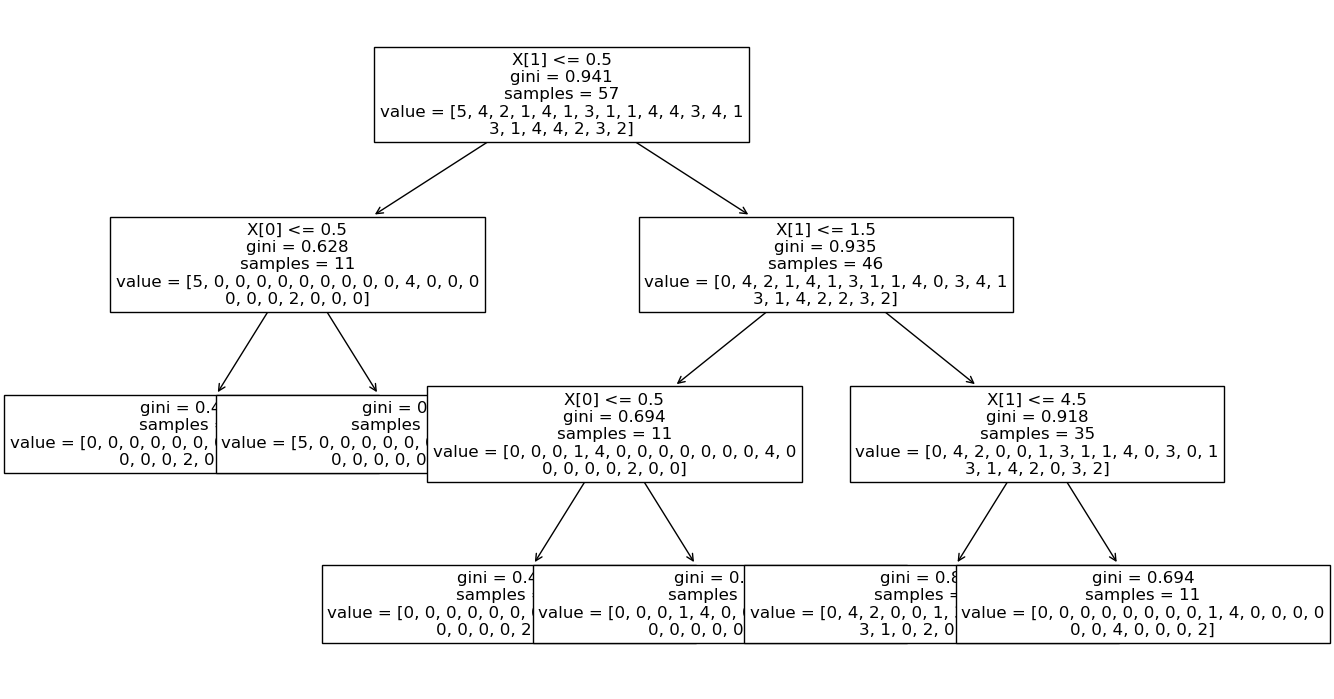

In [184]:
plt.rcParams['figure.dpi']=100
plt.subplots(figsize=(15,9))
tree.plot_tree(model_ku.fit(dataX_train,dataY_train),fontsize=12) 
plt.show()

In [185]:
masukkanMode=int(input("Masukkan Mode : "))
masukkanRute=int(input("Masukkan Rute : "))
hasil=model_ku.predict([[masukkanMode,masukkanRute]])
print(hasil)

[405]


In [186]:
cekdata=int(input("Cek data yang keluar : "))
print(dataset['Ticket Price'].where(data_dipakai[['Mode','Route']]<=cekdata))


    Mode  Route
0    NaN    NaN
1    NaN    NaN
2    NaN    NaN
3    NaN    NaN
4    NaN    NaN
..   ...    ...
67   NaN    NaN
68   NaN    NaN
69   NaN    NaN
70   NaN    NaN
71   NaN    NaN

[72 rows x 2 columns]
